In [1]:
# All the needed imports.
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

# Question 3 Kmeans 

In [2]:
# create a Pandas dataframe
Data = pd.read_csv('Data.csv')
Data

,X,Y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


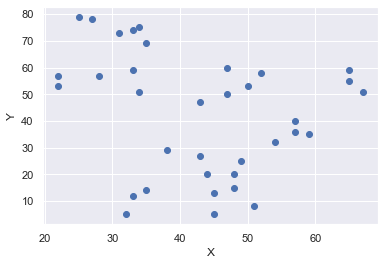

In [3]:
# Create a basic scatter plot chart as a base
plt.scatter(Data['X'],Data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
# Copy the csv file. 
x=Data.copy()

In [5]:
# create a function using the 
def Plot(num):
    kmeans=KMeans(num)
    kmeans.fit(x)
    cluster=x.copy()
    cluster['cluster_pred']=kmeans.fit_predict(x)
# plots the scatter chart    
    plt.scatter(cluster['X'],cluster['Y'],c=cluster['cluster_pred'],cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    point = kmeans.cluster_centers_
    point_r = np.round(point,2)
    print(point_r)

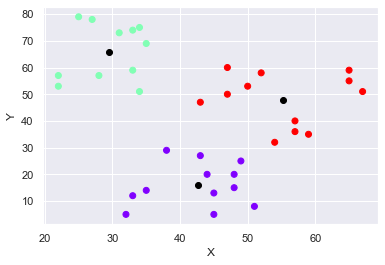

[[42.58 16.08]
 [29.45 65.91]
 [55.25 48.  ]]


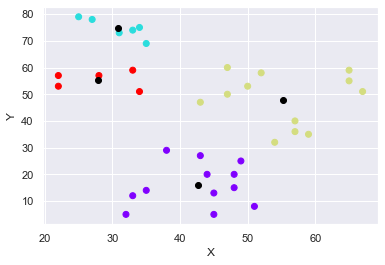

[[42.58 16.08]
 [30.83 74.67]
 [55.25 48.  ]
 [27.8  55.4 ]]


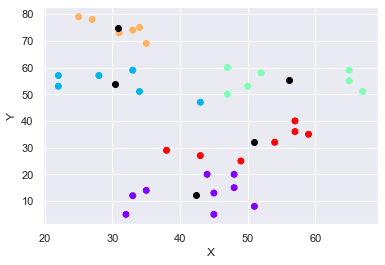

[[42.33 12.44]
 [30.33 54.  ]
 [56.14 55.14]
 [30.83 74.67]
 [51.   32.  ]]


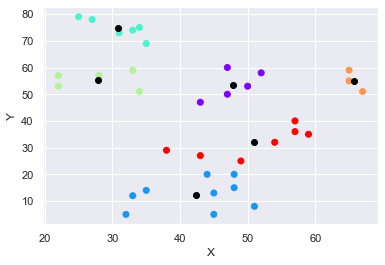

[[47.8  53.6 ]
 [42.33 12.44]
 [30.83 74.67]
 [27.8  55.4 ]
 [65.67 55.  ]
 [51.   32.  ]]


In [6]:
# plots the cluster graphs with the corrosponding number of clusters 
Plot(3)
Plot(4)
Plot(5)
Plot(6)

Q3) When the amount of clusters increases obviously the amount of centroids would change, but of the intertesing thing is the fact that some of the clusters split into multiple clusters and therfore the program forces a new centroid. My grouping were vastly different to my inital guess. 

# Question 4 The elbow method

In [7]:
# the preprocessing.scale() algorithm puts your data on one scale
x_scaled=preprocessing.scale(x)
x_scaled

array([[-1.46039069,  1.61438775],
       [-0.72199091,  0.36961985],
       [-1.70652396,  0.45853185],
       [-1.29630185,  1.56993175],
       [-0.80403533,  0.72526782],
       [-0.80403533,  1.39210777],
       [-0.96812417,  1.34765177],
       [-1.70652396,  0.63635583],
       [-0.63994648,  1.16982779],
       [-0.72199091,  1.43656376],
       [ 1.98547499,  0.36961985],
       [ 0.91889752, -0.47504407],
       [ 1.16503078, -0.1193961 ],
       [ 0.01640888,  0.19179587],
       [ 0.59071983,  0.45853185],
       [ 1.16503078, -0.29722009],
       [ 1.32911962, -0.34167609],
       [ 0.75480867,  0.68081183],
       [ 1.82138615,  0.72526782],
       [ 0.34458657,  0.76972382],
       [-1.21425743,  0.63635583],
       [-0.88607975, -1.67535597],
       [ 0.18049773, -1.319708  ],
       [ 0.42663099, -1.23079601],
       [ 0.34458657,  0.32516386],
       [ 0.50867541, -0.78623605],
       [ 0.42663099, -1.00851603],
       [-0.63994648, -1.27525201],
       [-0.80403533,

In [8]:
wcss =[]
#Loops random clusters and appends them. 
for i in range(1,30):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[70.0,
 33.66983365237527,
 15.110402480801152,
 11.376849832136358,
 8.723988152675584,
 6.551062568837752,
 4.381353810462871,
 3.4988067673984187,
 2.75028054584075,
 2.184076577192895,
 1.7417620003975944,
 1.3945027364078935,
 1.2860307998446059,
 1.1385308603888382,
 1.0589265078544687,
 0.8800370643356374,
 0.7713141355620898,
 0.6728332100662429,
 0.6496373538745983,
 0.5283633738516424,
 0.45348276776476976,
 0.37487610238829633,
 0.3389530956906884,
 0.24495156810929453,
 0.20835999455878312,
 0.17561674379593287,
 0.13816416010357946,
 0.10699610482851865,
 0.08229190983437505]

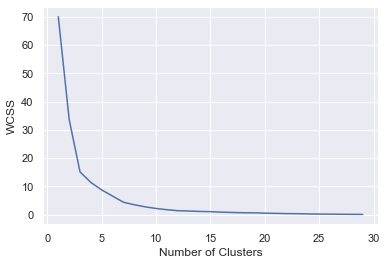

In [9]:
#Plots the optimal amount of clusters 
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Q4) The elbow method shows that the optimal amount of clusters are three, i predicted that their would be 5 clusters, therfore i ended up over secluding my data. 

In [10]:
#Prints the new cluter with the optimal clusters thanks to the elbow method 
kmeans_new = KMeans(3)
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']= kmeans_new.fit_predict(x_scaled)
cluster_new

,X,Y,cluster_pred
0,25,79,1
1,34,51,1
2,22,53,1
3,27,78,1
4,33,59,1
5,33,74,1
6,31,73,1
7,22,57,1
8,35,69,1
9,34,75,1


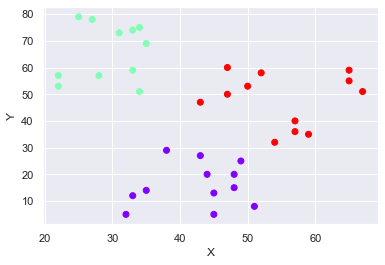

In [11]:
#Plots the clustser with the recemended clusters thanks to the elbow method 
plt.scatter(cluster_new['X'],cluster_new['Y'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Question 5 Adding Data 

In [12]:
# creates a pandas data frame of x and y 
a = pd.DataFrame({"X":[55,26,40,40],
                  "Y":[38,82,38,10]})

Data2 = Data.append(a,ignore_index =True)
#Simple print of the dataframe 
Data2

,X,Y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


In [13]:
x2=Data2.copy()
#Put data on one scale.
x_scaled2 = preprocessing.scale(x2)

In [14]:
#Shows the infomation and the cluster prediction  
kmeans_new = KMeans(3)
kmeans.fit(x_scaled2)
cluster2=x2.copy()
cluster2['cluster_pred']= kmeans_new.fit_predict(x_scaled2)
cluster2

,X,Y,cluster_pred
0,25,79,0
1,34,51,0
2,22,53,0
3,27,78,0
4,33,59,0
5,33,74,0
6,31,73,0
7,22,57,0
8,35,69,0
9,34,75,0


# Question 6 Cluster with appended data  

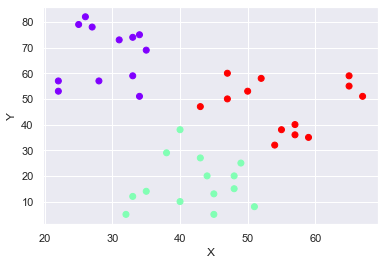

In [15]:
#Plots the data using the plt scatter
plt.scatter(cluster2['X'],cluster2['Y'],c=cluster2['cluster_pred'],cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Q7) KMeans works well to cluster simple data and also alows users to append their own data, the system is used for unlabled data meaning the program helps us come to a decion on what to do with the data. actually using KMeans for clustering was also quite painless, the program was simple to use in comparrson to other chart creation funtion in python. To summerise KMeans is useful and easier to use than other chart creaters. 

#  Confusion Matrix 

1a) A confusion matrix is a performance measurement tool, often used for machine learning classification tasks where the output of the model could be 2 or more classes. 

1b)The confusion matrix is used to see how often data ocurs.

1c) A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class. A false positive is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

1d) The confusion matrix is especially useful when measuring recall, precision, specificity, accuracy, and the AUC of a classification model.

# Q2 Example of a confusion matrix in Python and Jupyter Notebooks 

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
# The actual vs the prediction data 
x = np.array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1])
y = np.array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [18]:
#Prints the data gven by the actuals and the predictions 
print("Confusion matrix \n", confusion_matrix(x, y))

Confusion matrix 
 [[1 1]
 [2 6]]


In [19]:
#This is to turn the Negatives and Positives into variables
TN, FN, FP, TP = confusion_matrix(x, y).ravel()
print("True Negative:",TN)
print("False Negative:",FN)
print("False Positive:",FP)
print("True Positive:",TP)

#This is to find the accuracy of the matrix 
accuracy = TN + TP / TN + FP + TP + FN
precsion = TP / TP + FP
recall = TP / TP + FN
error = 2 * precsion * recall / precsion + recall

#Print the equations 
print("\nAccuracy:",accuracy)
print("Precsion:", precsion)
print("Error Rate:",error )

True Negative: 1
False Negative: 1
False Positive: 2
True Positive: 6

Accuracy: 16.0
Precsion: 3.0
Error Rate: 6.0


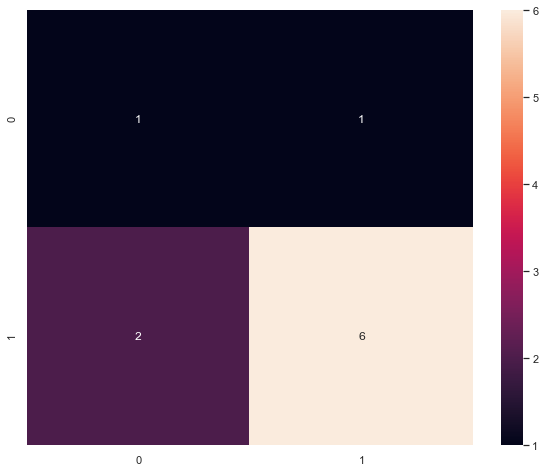

In [34]:
#https://dataaspirant.com/confusion-matrix-sklearn-python/
#This gives the matrix a heat map to make the data easier to see.
import seaborn as sns
from matplotlib import pyplot as plt
cf_train_matrix = confusion_matrix(x, y)
plt.figure(figsize=(10,8))
#Uses a heat map to show the data
sns.heatmap(cf_train_matrix, annot=True, fmt='d')

The confusion matrix is cheking for true postivtes and true negatives.

# Simple Perceptron Neural Network 

In [31]:
# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])

# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


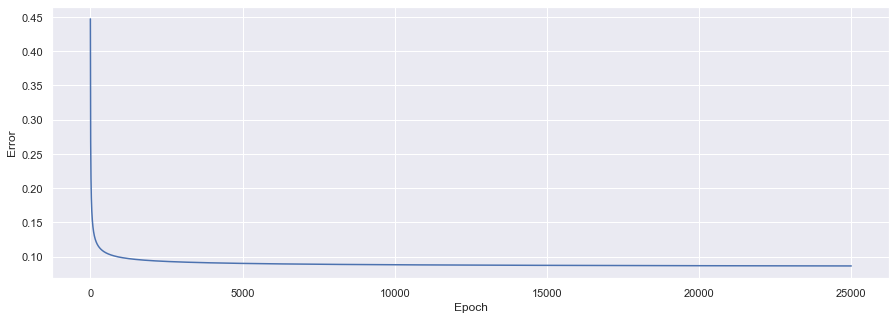

In [32]:
class NeuralNetwork:
    
    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction
    
    # create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# Sample 1

In [24]:
# input data
inputs1 = np.array([[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]])

# output data
outputs1 = np.array([[0], [0], [0], [1], [1], [1]])

[[0.73105858]]  - Correct:  1
[[0.73105858]]  - Correct:  0


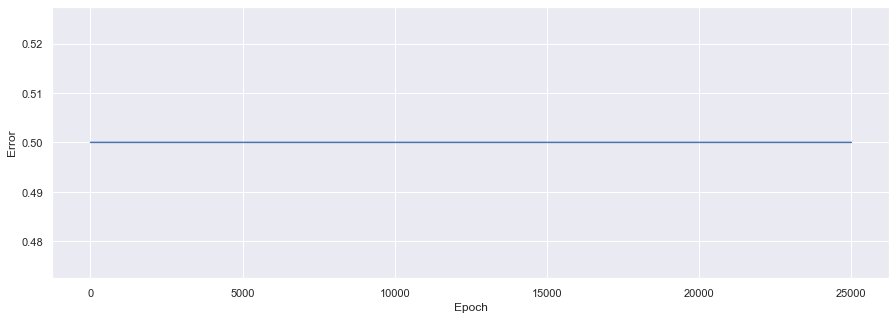

In [25]:
class NeuralNetwork:
    
    # intialize variables in class
    def __init__(self, inputs1, outputs):
        self.inputs1  = inputs1
        self.outputs1 = outputs1
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs1, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs1 - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs1.T, delta)

    # train the neural net for 1000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction
    
    # create neural network   
NN = NeuralNetwork(inputs1, outputs1)
# train neural network
NN.train()

example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# Sample 2

In [39]:
# input data
inputs2 = np.array([[1, 1, 0],
                   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

# output data
outputs2 = np.array([[0], [0], [0], [1], [1], [1]])

[[0.50004085]]  - Correct:  1
[[0.98725849]]  - Correct:  0


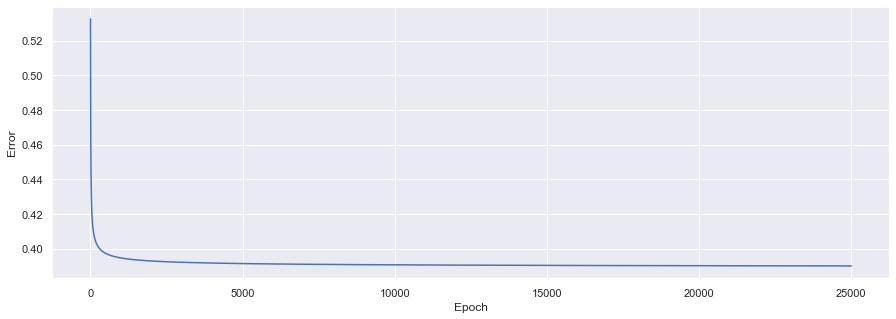

In [40]:
class NeuralNetwork:
    
    # intialize variables in class
    def __init__(self, inputs2, outputs2):
        self.inputs2  = inputs2
        self.outputs2 = outputs2
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs2, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs2 - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs2.T, delta)

    # train the neural net for 1000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction
    
    # create neural network   
NN = NeuralNetwork(inputs2, outputs2)
# train neural network
NN.train()

example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()